# Plastic User Analysis..
> Complete Data Analysis  And Data Visualization Of Plastic Users.


In [1]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/plastic-pollution/1- global-plastics-production.csv
/kaggle/input/plastic-pollution/3- share-plastic-fate.csv
/kaggle/input/plastic-pollution/2- share-of-global-plastic-waste-emitted-to-the-ocean.csv
/kaggle/input/plastic-pollution/4- mismanaged-plastic-waste-per-capita.csv


**Import File**

In [2]:
df=pd.read_csv('/kaggle/input/plastic-pollution/1- global-plastics-production.csv')
df.head(5)

,Entity,Code,Year,Annual plastic production between 1950 and 2019
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Entity                                           69 non-null     object
 1   Code                                             69 non-null     object
 2   Year                                             69 non-null     int64 
 3   Annual plastic production between 1950 and 2019  69 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


> Checking For Missing Values ..

In [4]:
print(df.isnull().sum())

Entity                                             0
Code                                               0
Year                                               0
Annual plastic production between 1950 and 2019    0
dtype: int64


**Data Cleaning**
> Ensure all columns have appropriate data types
> > Handle any missing values if present

In [5]:
# df['Year'] = df['Year'].astype(int)
# df['Annual plastic production between 1950 and 2019 '] = df['Annual plastic production between 1950 and 2019'].astype(float)
# df.fillna(0, inplace=True)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Annual plastic production between 1950 and 2019'] = pd.to_numeric(df['Annual plastic production between 1950 and 2019'], errors='coerce')

# Drop rows with NaN values (which were non-numeric originally)
df.dropna(subset=['Year', 'Annual plastic production between 1950 and 2019'], inplace=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Entity                                           69 non-null     object
 1   Code                                             69 non-null     object
 2   Year                                             69 non-null     int64 
 3   Annual plastic production between 1950 and 2019  69 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB
None


# **Data Analysis**

**Summary Statistics...**

**Total plastic production over the years**

In [6]:
print(df.describe())
total_production_per_year = df.groupby('Year')['Annual plastic production between 1950 and 2019'].sum().reset_index()
top_entities = df.groupby('Entity')['Annual plastic production between 1950 and 2019'].sum().sort_values(ascending=False).head(10).reset_index()



              Year  Annual plastic production between 1950 and 2019
count    69.000000                                     6.900000e+01
mean   1984.652174                                     1.375638e+08
std      20.460023                                     1.320418e+08
min    1950.000000                                     2.000000e+06
25%    1967.000000                                     2.300000e+07
50%    1985.000000                                     9.000000e+07
75%    2002.000000                                     2.310000e+08
max    2019.000000                                     4.597460e+08


# Data Visualization

/tmp/ipykernel_19/236244646.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


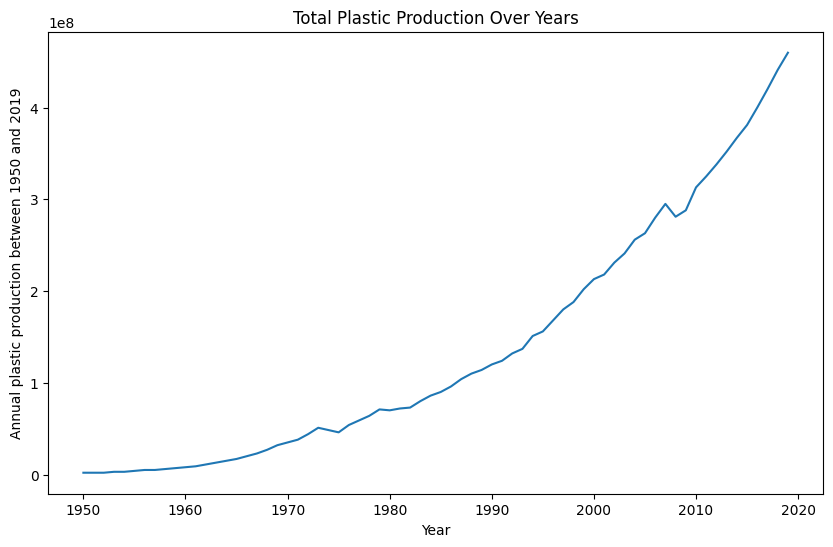

In [7]:

# Handle the FutureWarning for inf values
pd.options.mode.use_inf_as_na = True

# Line plot for total plastic production over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_production_per_year, x='Year', y='Annual plastic production between 1950 and 2019')
plt.title('Total Plastic Production Over Years')
plt.xlabel('Year')
plt.ylabel('Annual plastic production between 1950 and 2019')
plt.show()





/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


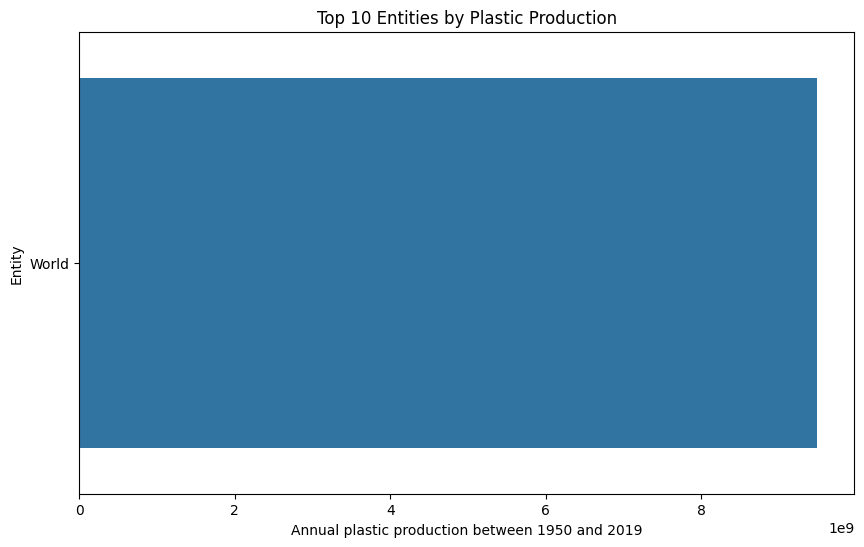

In [8]:
# Handle the FutureWarning for bar plot grouping
# Bar plot for top entities by plastic production
plt.figure(figsize=(10, 6))
sns.barplot(data=top_entities, x='Annual plastic production between 1950 and 2019', y='Entity')
plt.title('Top 10 Entities by Plastic Production')
plt.xlabel('Annual plastic production between 1950 and 2019')
plt.ylabel('Entity')
plt.show()


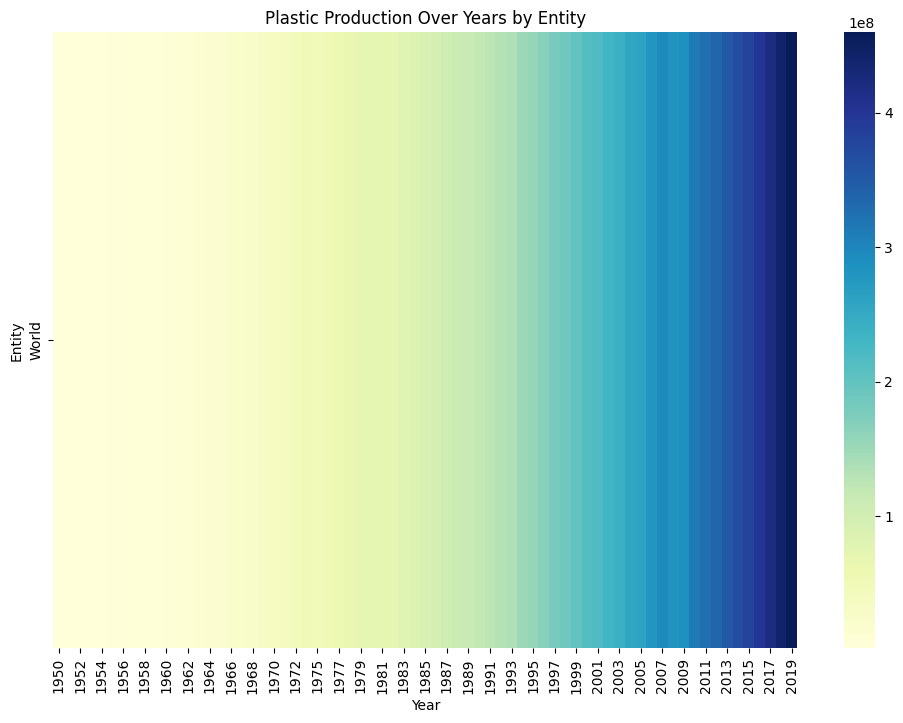

In [9]:
# Correct usage of pivot for heatmap
pivot_table = df.pivot(index='Entity', columns='Year', values='Annual plastic production between 1950 and 2019')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Plastic Production Over Years by Entity')
plt.xlabel('Year')
plt.ylabel('Entity')
plt.show()

# Trend Analysis

In [10]:
total_production_per_year['Growth_Rate'] = total_production_per_year['Annual plastic production between 1950 and 2019'].pct_change() * 100
print(total_production_per_year)


    Year  Annual plastic production between 1950 and 2019  Growth_Rate
0   1950                                          2000000          NaN
1   1951                                          2000000     0.000000
2   1952                                          2000000     0.000000
3   1953                                          3000000    50.000000
4   1954                                          3000000     0.000000
..   ...                                              ...          ...
64  2015                                        381000000     3.814714
65  2016                                        400050000     5.000000
66  2017                                        420052500     5.000000
67  2018                                        441055140     5.000004
68  2019                                        459746020     4.237765

[69 rows x 3 columns]


# Comparative Analysis

> Visualize the growth rate over the years.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


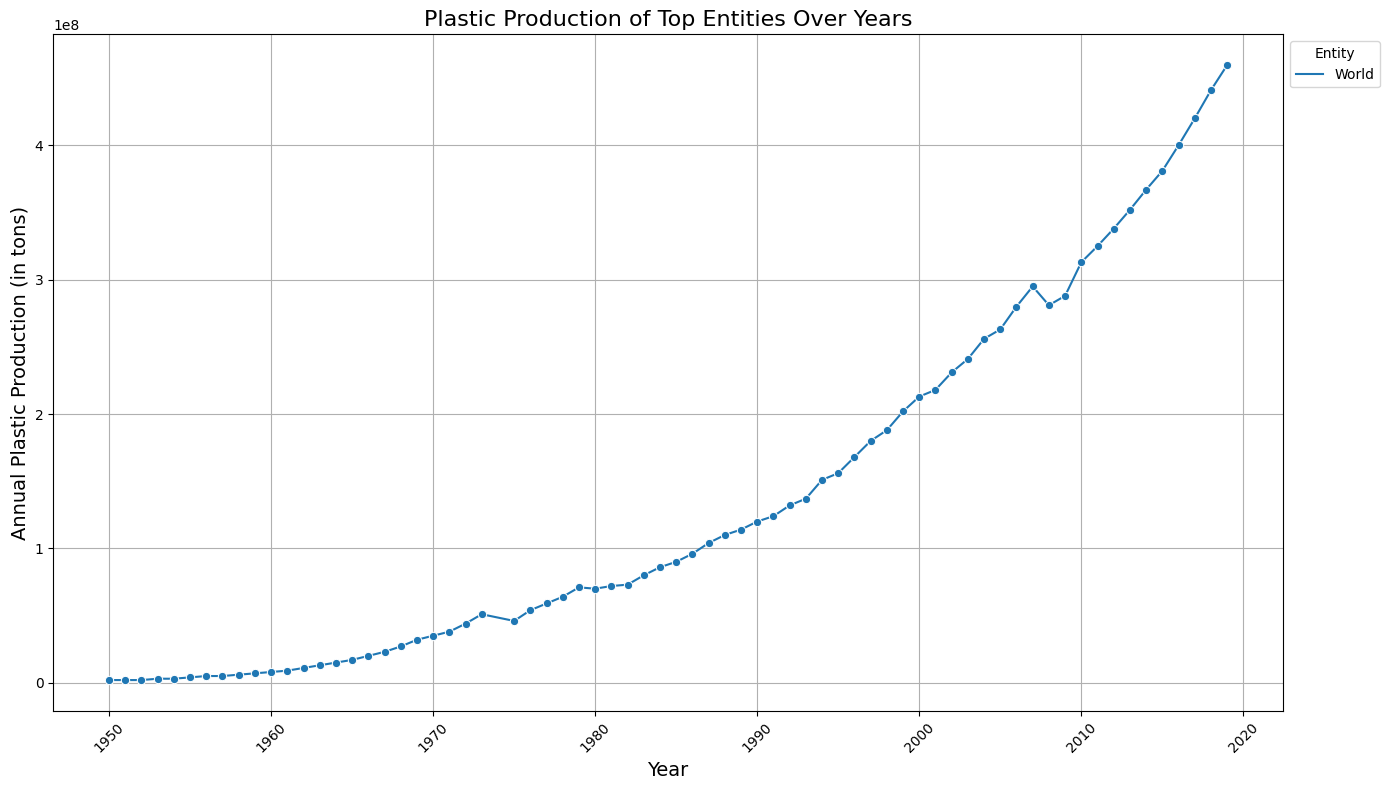

In [11]:
top_entities_list = top_entities['Entity'].tolist()
top_entities_data = df[df['Entity'].isin(top_entities_list)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=top_entities_data, x='Year', y='Annual plastic production between 1950 and 2019', hue='Entity', marker='o')
plt.title('Plastic Production of Top Entities Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Plastic Production (in tons)', fontsize=14)
plt.legend(title='Entity', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Trend Analysis 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


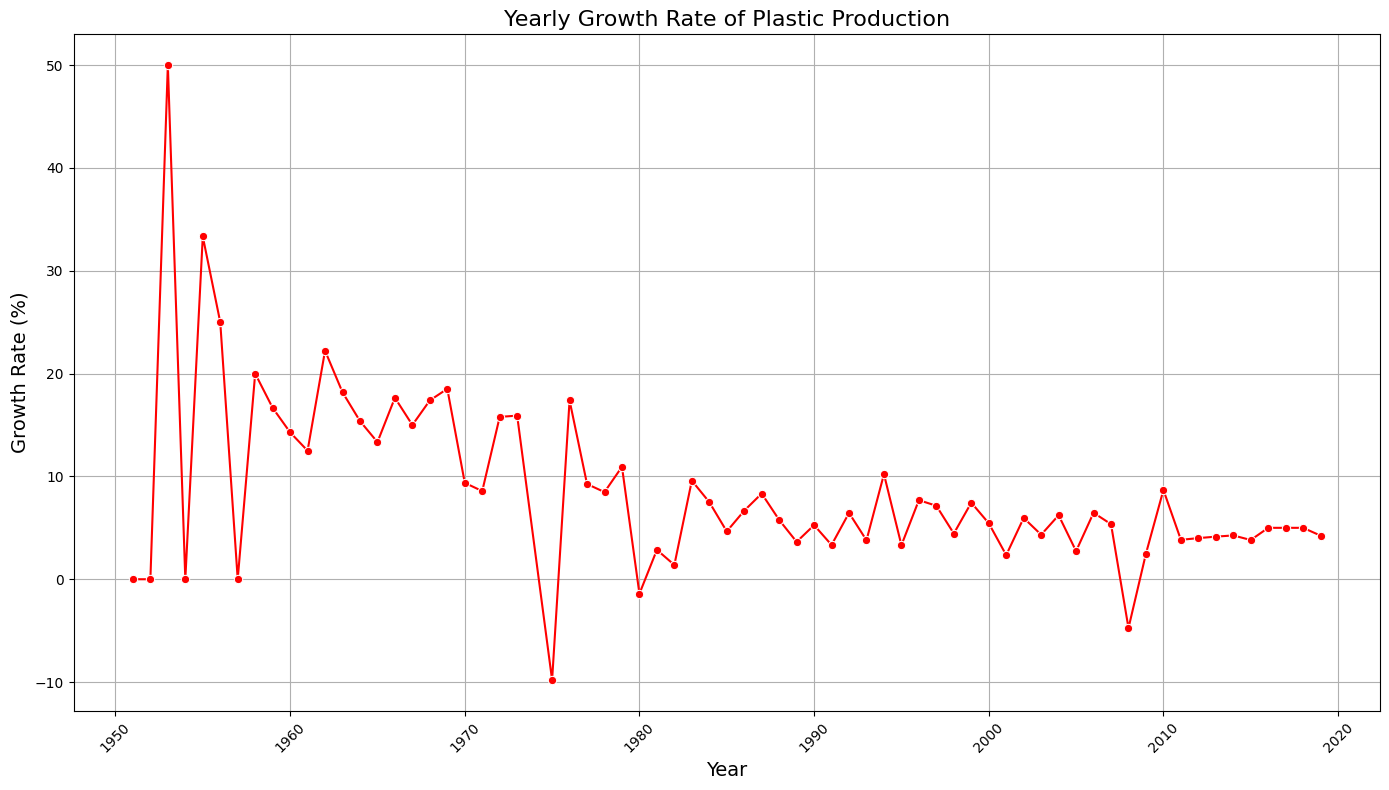

In [12]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=total_production_per_year, x='Year', y='Growth_Rate', marker='o', color='r')
plt.title('Yearly Growth Rate of Plastic Production', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Growth  Rate Of Plastic Production Is Directly Proportional To The Plastic Users 
> These Analysis Depends On The Production Of Plastic Accordingly With The Users.... 

# Inference From The Analysis : 


1. The line plot shows a significant increase in total plastic production from 1950 to 2019. The production rate accelerates notably after the 1980s.

2. The bar plot highlights the top 10 entities (countries or companies) contributing the most to global plastic production.

3. The growth rate of plastic production fluctuates year by year, with periods of rapid growth and occasional slowdowns or declines.

4. Different entities exhibit varying trends in plastic production over the years. Some entities show consistent growth, while others have more erratic production patterns.

5. The heatmap reveals the distribution of plastic production across different entities over the years, highlighting which entities were the major producers in specific time periods.



1. **Exponential Growth:** There has been a steady and significant increase in plastic production from 1950 to 2019, with rapid acceleration post-1980s.

2. **Concentration of Production:** A small number of entities dominate global plastic production, indicating concentrated industrial capabilities.

3. **Fluctuating Growth Rates:** Annual growth rates show variability, influenced by external economic and regulatory factors.

4. **Entity-Specific Trends:** Different entities have unique production trends, influenced by local conditions and policies.

5. **Historical Shifts:** The heatmap provides a detailed view of historical production patterns, helping to understand shifts in global plastic production dynamics.

# Recommendations for Further Analysis :



**Impact of Policies:** Investigate how changes in environmental policies in major producing countries have impacted plastic production trends.

**Economic Correlation:** Analyze the correlation between global economic indicators (such as GDP growth) and plastic production growth rates.

**Sustainability Practices:** Explore the adoption of sustainable practices among top producers and their impact on production trends.

**Consumer Behavior:** Study the impact of changing consumer behavior and preferences on plastic production and demand.